<a href="https://colab.research.google.com/github/tiiagoo321/mentoria_github/blob/main/Deliverable_2_Tiago_de_Lima_34597.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deliverable 2

Walmart

Analista: Tiago de Lima Silva

RID: 34597

# Bibliotecas

In [ ]:

import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import seaborn as sns
sns.set_palette("Accent")
sns.set_style("darkgrid")
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')


# Leitura dos Dados

In [ ]:
df = pd.read_csv('//content/sample_data/Walmart.csv',sep=',')
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.57,211.10,8.11
1,1,12-02-2010,1641957.44,1,38.51,2.55,211.24,8.11
2,1,19-02-2010,1611968.17,0,39.93,2.51,211.29,8.11
3,1,26-02-2010,1409727.59,0,46.63,2.56,211.32,8.11
4,1,05-03-2010,1554806.68,0,46.50,2.62,211.35,8.11


# Verificando valores ausentes e infos gerais

In [ ]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


# Transformação em Data de objeto pra datetime

In [ ]:

pd.set_option("float_format" ,"{:.2f}".format)
df['Date'] = pd.to_datetime(df['Date'])
df['Store'] = df['Store'].astype(object)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   object        
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 402.3+ KB


# Verificando o tamanho do DATASET

In [ ]:
df.shape


(6435, 8)

# Verificando se tem dados faltantes

In [ ]:
df.isnull().count()

Store           6435
Date            6435
Weekly_Sales    6435
Holiday_Flag    6435
Temperature     6435
Fuel_Price      6435
CPI             6435
Unemployment    6435
dtype: int64

# Análise estatística descritiva

In [ ]:
df.describe().round()

,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.00,6435.00,6435.00,6435.00,6435.00,6435.00
mean,1046965.00,0.00,61.00,3.00,172.00,8.00
std,564367.00,0.00,18.00,0.00,39.00,2.00
min,209986.00,0.00,-2.00,2.00,126.00,4.00
25%,553350.00,0.00,47.00,3.00,132.00,7.00
50%,960746.00,0.00,63.00,3.00,183.00,8.00
75%,1420159.00,0.00,75.00,4.00,213.00,9.00
max,3818686.00,1.00,100.00,4.00,227.00,14.00


# Matrix de Correlação

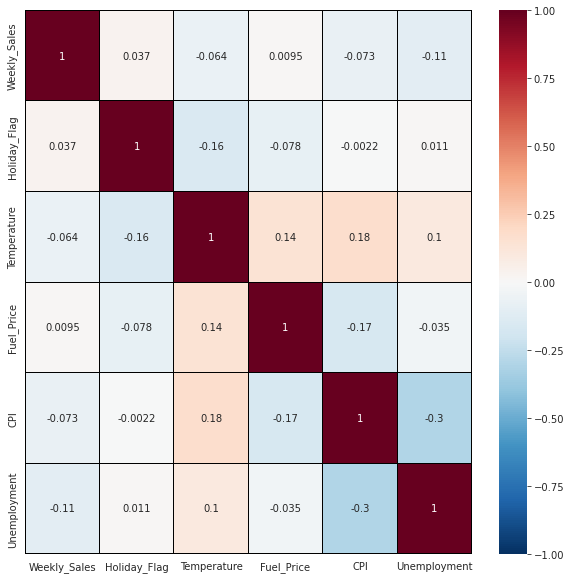

In [ ]:
f, ax = plt.subplots(figsize= (10,10))

sns.heatmap(df.corr(), vmin=-1, vmax=1, linewidth=0.01, linecolor='black', cmap='RdBu_r', annot = True)

plt.show()

# Análise Gráfica

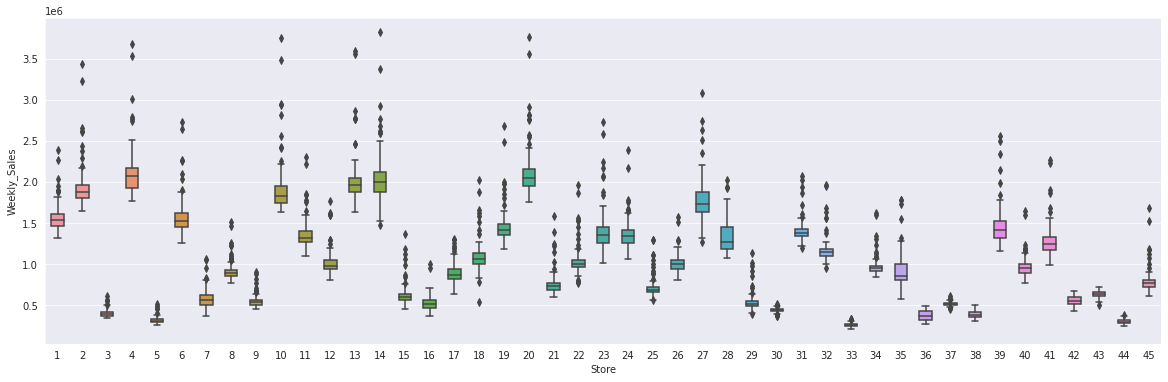

In [ ]:
ax = sns.boxplot(y= 'Weekly_Sales', x= 'Store', data = df, orient = 'v', width = 0.5)
ax.figure.set_size_inches(20,6)


# Removendo Outlies

In [ ]:
Store = df.groupby('Store')['Weekly_Sales']


In [ ]:
Q1 = Store.quantile(.25)
Q3 = Store.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ


In [ ]:
novos_dados = pd.DataFrame()
for Store in Store.groups.keys():
 eh_loja = df['Store'] == Store
 eh_dentro_limite = (df["Weekly_Sales"] >= limite_inferior[Store]) & (df['Weekly_Sales'] <= limite_superior[Store])
 selecao = eh_loja & eh_dentro_limite
 dados_selecao = df[selecao]
 novos_dados = pd.concat([novos_dados, dados_selecao])


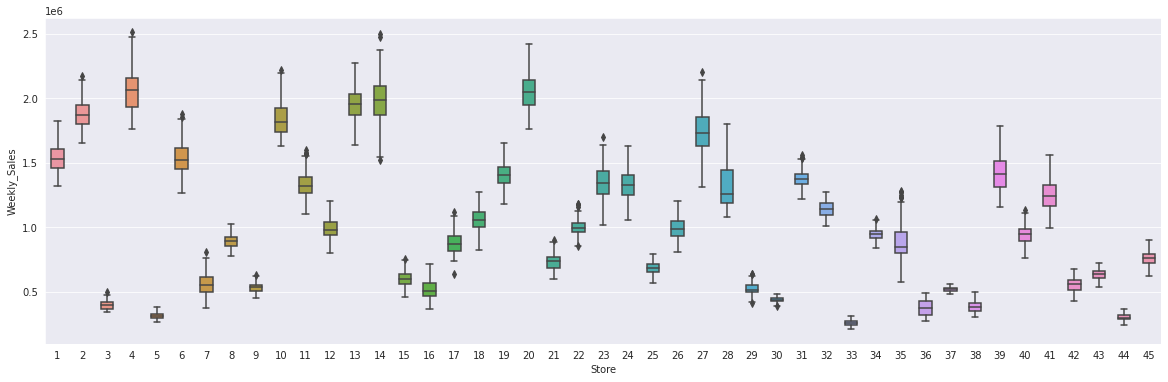

In [ ]:
 ax = sns.boxplot(y= 'Weekly_Sales', x= 'Store', data = novos_dados, orient = 'v', width = 0.5)
ax.figure.set_size_inches(20,6)


In [ ]:
novos_dados.describe().round(2)


,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6135.00,6135.00,6135.00,6135.00,6135.00,6135.00
mean,1019223.05,0.06,61.52,3.37,171.49,8.00
std,534843.09,0.24,18.20,0.46,39.37,1.89
min,209986.25,0.00,-2.06,2.47,126.06,3.88
25%,545080.82,0.00,48.74,2.92,131.59,6.89
50%,945143.33,0.00,63.78,3.48,182.61,7.87
75%,1398522.14,0.00,75.56,3.74,212.76,8.62
max,2508955.24,1.00,100.14,4.47,227.23,14.31


In [ ]:
novos_dados.shape

(6135, 8)

# Gráfico média de venda 

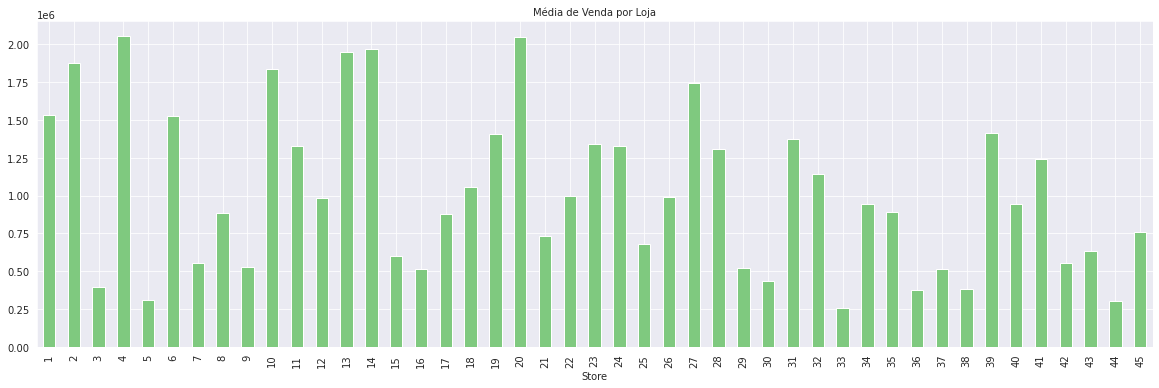

In [ ]:
Loja = novos_dados.groupby('Store')

fig= Loja['Weekly_Sales'].mean().plot.bar()
plt.rc('figure', figsize = (20,6))
fig.set_title('Média de Venda por Loja', {'fontsize':10});
plt.show()

# Média com maiores vendas de faturamentos

In [ ]:
novos_dados.groupby(['Store'])['Weekly_Sales'].mean().round(2).sort_values(ascending = False). head(10)


Store
4    2051352.01
20   2048491.53
14   1971226.61
13   1950209.06
2    1877173.64
10   1836056.26
27   1746662.70
1    1530028.21
6    1528222.86
39   1416594.06
Name: Weekly_Sales, dtype: float64